# ЛР 4. Наивный байесовский классификатор

## Подготовка

Импортируем нужные нам модули

In [1]:
from os import walk
import re

from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import cross_validate, train_test_split
from sklearn.metrics import roc_curve, precision_score, accuracy_score, plot_confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


Пройдёмся по всем файлам и импортируем из них данные (формат очень удобный, да)

In [2]:
files = []
for (dirpath, dirnames, filenames) in walk("./messages/"):
    print(dirpath, dirnames, filenames)
    files.extend(filenames)
    break

X = []
Y = []
for file in files:
    with open("./messages/" + file, "r") as f:
        header = f.readline()
        no = f.readline()
        message = f.readline()
        pred = re.search("^.*legit.*$", file)
        if (pred):
            Y.append(0)
        else:
            Y.append(1)
        tmp_arr = np.array(" ".join(header.split()[1:]) + " " + message).astype(str)
        X.append(tmp_arr)
        
X = np.array(X)
Y = np.array(Y)

./messages/ [] ['9546legit21.txt', '4589spmsg100.txt', '41074legit30.txt', '9975legit14.txt', '6111legit39.txt', '2181spmsg66.txt', '7550legit10.txt', '917spmsg96.txt', '646legit14.txt', '9794legit54.txt', '6144legit30.txt', '0873legit53.txt', '8771spmsg71.txt', '7823legit60.txt', '9911legit41.txt', '2931legit0.txt', '9613legit33.txt', '0885spmsg84.txt', '5968spmsg98.txt', '6820spmsg96.txt', '091legit34.txt', '5709spmsg76.txt', '416legit6.txt', '2502spmsg81.txt', '61072legit53.txt', '1617legit43.txt', '0439spmsg89.txt', '3295legit7.txt', '6586legit47.txt', '6546legit54.txt', '077spmsg105.txt', '5726legit35.txt', '9994legit44.txt', '7791legit30.txt', '5890legit29.txt', '81086legit13.txt', '9863legit32.txt', '9482spmsg63.txt', '9613spmsg68.txt', '3464legit0.txt', '0661spmsg76.txt', '7416legit7.txt', '0170legit58.txt', '8916legit14.txt', '3601spmsg88.txt', '1396legit12.txt', '71050legit29.txt', '8830legit39.txt', '5242spmsg91.txt', '8353spmsg92.txt', '5535spmsg92.txt', '8430legit4.txt', '

Преобразуем данные в разреженный набор признаков

In [3]:
c_vec = CountVectorizer()
c_vec.fit(X)
doc_array = c_vec.transform(X).toarray()
doc_array.shape
X_vec = c_vec.fit_transform(X).toarray()

Разделим данные на тренировочную и тестовую выборки

In [4]:
X_train, X_test, Y_train, Y_test = train_test_split(X_vec, Y, train_size=0.9)

Выведем итоговую матрицу с векторизованными данными

In [5]:
freq_matrix = pd.DataFrame(doc_array, columns=c_vec.get_feature_names())
freq_matrix

,10,100,1000,10000,10001,10002,10003,10004,10005,10006,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1085,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1086,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1087,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1088,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


r2:        64.63%
recall:    81.88%
precision: 98.17%
f1:        88.89%
accuracy:  91.28%
roc_auc:   99.12%


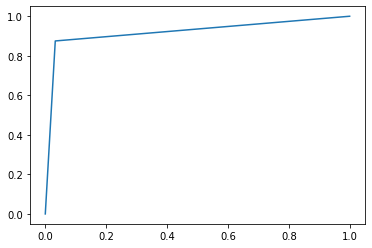

In [14]:
scores = cross_validate(BernoulliNB(), X_vec, Y, cv=10,
                        scoring=('r2', 'recall', 'precision',
                                 'f1', 'accuracy', 'roc_auc'),
                        return_train_score=True)

fpr, tpr, thresholds = roc_curve(Y_test, BernoulliNB().fit(X_train, Y_train).predict(X_test))
plt.plot(fpr, tpr)
print(f"r2:        {(sum(scores['test_r2']) / 10):.2%}")
print(f"recall:    {(sum(scores['test_recall']) / 10):.2%}")
print(f"precision: {(sum(scores['test_precision']) / 10):.2%}")
print(f"f1:        {(sum(scores['test_f1']) / 10):.2%}")
print(f"accuracy:  {(sum(scores['test_accuracy']) / 10):.2%}")
print(f"roc_auc:   {(sum(scores['test_roc_auc']) / 10):.2%}")

In [7]:
tmp_alpha1 = np.arange(1e-11, 1e10, 5e8).reshape(-1, 1)
tmp_alpha2 = np.array([1e-11] * len(tmp_alpha1)).reshape(-1, 1)

fog_gc = np.append(tmp_alpha1, tmp_alpha2, axis=1).tolist()

In [8]:
best_score_pre = 0
for i in fog_gc:
    clf = BernoulliNB(class_prior=i)
    clf = clf.fit(X_vec, Y)
    Y_pred = clf.predict(X_vec)
    pre = precision_score(Y, Y_pred)
    if pre > best_score_pre:
        best_score_pre = pre
        best_grid_pre = i

print("Best params for precision:",best_grid_pre)
print("Best score:", best_score_pre)

Best params for precision: [4000000000.0, 1e-11]
Best score: 1.0


Confusion Matrix: precision = 1.0


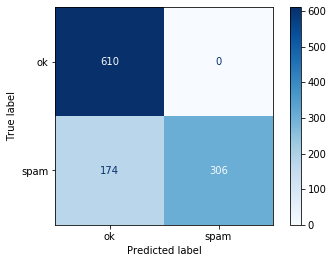

In [9]:
clf1 = BernoulliNB(class_prior=[4000000000.0, 1e-11])
clf1 = clf1.fit(X_vec, Y)

plot_confusion_matrix(clf1, X_vec, Y,
                      cmap=plt.cm.Blues,
                      display_labels=["ok", "spam"],
                      values_format='d')
print("Confusion Matrix: precision = 1.0")

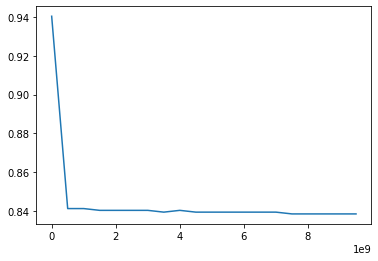

In [10]:
scores = []
alpha = []
for i in fog_gc:
    clf = BernoulliNB(class_prior=i)
    clf = clf.fit(X_vec, Y)
    scores.append(accuracy_score(Y, clf.predict(X_vec)))
    alpha.append(i[0])

plt.plot(alpha, scores)

In [11]:
tmp_alpha1 = np.arange(1, 1e5, 1000).reshape(-1, 1)
tmp_alpha2 = np.array([1e15] * len(tmp_alpha1)).reshape(-1, 1)

fog_gc = np.append(tmp_alpha1, tmp_alpha2, axis=1).tolist()

best_score = 0
for i in fog_gc:
    clf = BernoulliNB(class_prior=i)
    clf = clf.fit(X_vec, Y)
    Y_pred = clf.predict(X_vec)
    acc = accuracy_score(Y, Y_pred)
    if (acc > best_score):
        best_score = acc
        best_grid = i

print("Best params:", best_grid)
print("Best score:", best_score)

Best params: [29001.0, 1000000000000000.0]
Best score: 0.9844036697247707


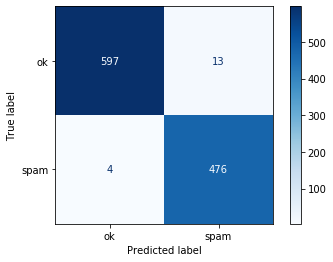

In [12]:
clf1 = BernoulliNB(class_prior=best_grid)
clf1 = clf1.fit(X_vec, Y)

plot_confusion_matrix(clf1, X_vec, Y,
                      cmap=plt.cm.Blues,
                      display_labels=["ok", "spam"],
                      values_format='d')